### Breast cancer


- 10, 5, 2 차원으로 축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원 축소는 시각화
- 군집화

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
bc_std = StandardScaler().fit_transform(bc.data)

- Dimensionality reduction & Clustering

In [23]:
len(bc.target_names)

2

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state = 2021)
km.fit(bc_std)

KMeans(n_clusters=2, random_state=2021)

In [36]:
from sklearn.decomposition import PCA

for i in [2, 5, 10] :
    globals()['bc{}'.format(i)] = PCA(n_components = i).fit_transform(bc_std)
    globals()['df{}'.format(i)] = pd.DataFrame( globals()['bc{}'.format(i)], columns = [f'pc{j}' for j in range(1, i + 1)])
    globals()['df{}'.format(i)]['target'] = bc.target
    globals()[f'df{i}']['cluster'] = km.labels_

- Accuracy

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
for i in ['',2, 5, 10] :
    if i == '' :
        X_train, X_test, y_train, y_test = train_test_split(
        bc.data, bc.target, stratify = bc.target, random_state = 2021
        )
    else :
        X_train, X_test, y_train, y_test = train_test_split(
            globals()['bc{}'.format(i)], bc.target, stratify = bc.target, random_state = 2021
        )

    dtc = DecisionTreeClassifier(random_state = 2021)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f'PCA {i} : {score}')

PCA  : 0.9090909090909091
PCA 2 : 0.916083916083916
PCA 5 : 0.951048951048951
PCA 10 : 0.9790209790209791


- Visualization

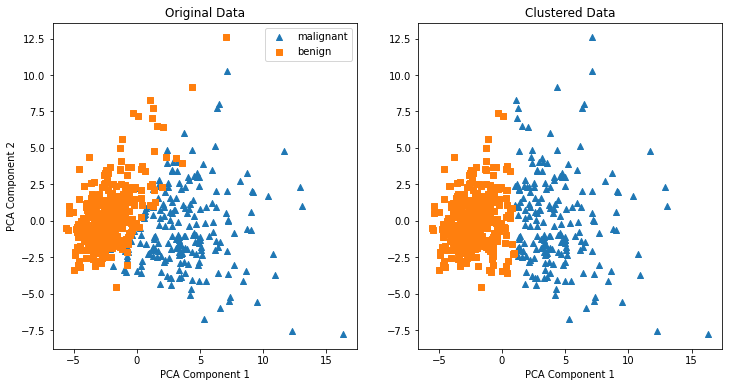

In [28]:
markers = ['^', 's']
fig, axs = plt.subplots(figsize = (12, 6), ncols = 2, nrows = 1)

for k, column in enumerate(['target','cluster']) :
    ax = axs[k]
    ax.set_xlabel('PCA Component 1')
    
    for i, marker in enumerate(markers) :
        x_axis_data = df2[df2[column] == i]['pc1']
        y_axis_data = df2[df2[column] == i]['pc2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker, label = bc.target_names[i])

    if k == 0 :
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')

    else :
        ax.set_title('Clustered Data')